<a href="https://colab.research.google.com/github/killerrings/Coursera/blob/master/Digit_Recognition_using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
#Install dependencies
import tensorflow as tf
print(tf.__version__)

2.2.0


In [0]:
#Load the dataset and split it into train and test sets
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

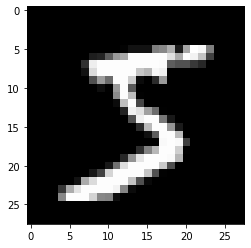

In [36]:
#Plotting the training array and the 1st image
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap='gray')
print(x_train[0])
print(y_train[0])

In [0]:
#Since the array of images are not in a grayscale format we convert it to ana array from 0 to 1 
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

In [22]:
#Defining our basic Neural network model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)
# model = keras.Sequential([keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu, input_shape=(28, 28, 1) ),
#                           keras.layers.MaxPooling2D(2, 2),
#                           keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu, input_shape=(28, 28, 1) ),
#                           keras.layers.MaxPooling2D(2, 2),
#                           keras.layers.Flatten(input_shape=()), #Flatteing images so that we convert the (28,28) pixel array to (1,784)
#                           keras.layers.Dense(128, activation=tf.nn.relu), #Relu basically returns X for X>0 else 0
#                           keras.layers.Dense(128, activation=tf.nn.relu),  
#                           keras.layers.Dense(10, activation=tf.nn.softmax)])  #Softmax takes a set of values and passes the biggest one

Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1476 - accuracy: 0.9565
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0497 - accuracy: 0.9852
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0320 - accuracy: 0.9901
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0217 - accuracy: 0.9927
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0149 - accuracy: 0.9950
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0099 - accuracy: 0.9970
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0085 - accuracy: 0.9970
Epoch 8/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0075 - accuracy: 0.9974
Epoch 9/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0055 - accuracy: 0.9984
Epoch 10/10
313/313 [==============================] - 2s 6ms/st

In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [27]:
#Using the evaluate method to print out the loss and our accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("/nModel accuracy is: ", test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0575 - accuracy: 0.9862
/nModel accuracy is:  0.9861999750137329


In [0]:
#Using the predict method for defining a variable called pre to be used to predict our desired values
pre = model.predict([test_images])

In [29]:
#Priniting our prediction of the 100th image in the MNIST dataset
import numpy as np
print(np.argmax(pre[100]))

6


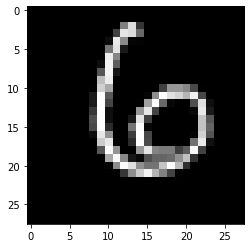

In [38]:
import matplotlib.pyplot as plt
plt.imshow(x_test[100], cmap='gray')